In [1]:
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf
import pandas as pd
import scipy.stats as stats

In [2]:
# Activation functions:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0.01*x, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Derivatives:

def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

In [3]:
# 0.001

# Using 9 sensors:

# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D9 = pd.read_csv('C:/Users/basil/Downloads/data3d_9.csv')

X = D9.iloc[:,0:9]
y = D9.iloc[:,9:12]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.001

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 9
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_001 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_001[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_001 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_001[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_001 = pd.DataFrame(y_pred_001.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

 # End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Elapsed time:  260.28621339797974  seconds


In [4]:
# 0.01

# Using 9 sensors:

# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D9 = pd.read_csv('C:/Users/basil/Downloads/data3d_9.csv')

X = D9.iloc[:,0:9]
y = D9.iloc[:,9:12]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 9
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_01 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_01[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_01 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_01[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_01 = pd.DataFrame(y_pred_01.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

 # End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Elapsed time:  265.19785952568054  seconds


In [5]:
# 0.1

# Using 9 sensors:

# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D9 = pd.read_csv('C:/Users/basil/Downloads/data3d_9.csv')

X = D9.iloc[:,0:9]
y = D9.iloc[:,9:12]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 9
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_1 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_1[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_1 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_1 = pd.DataFrame(y_pred_1.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Elapsed time:  265.2816026210785  seconds


0.0013535086567195737
0.00033177573009998283
0.00015076384689445338


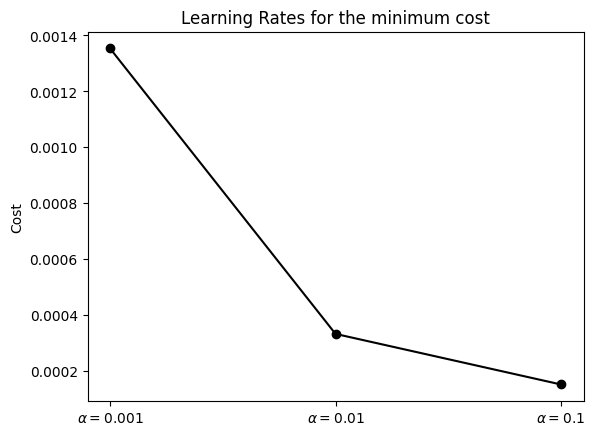

In [6]:
# Graphs for learning rate:
print(np.min(J_001))
print(np.min(J_01))
print(np.min(J_1))

plt.plot([1, 2, 3],[np.min(J_001),np.min(J_01),np.min(J_1)],color = 'black',marker = 'o')
# Add title and labels to the plot
plt.title('Learning Rates for the minimum cost')
# Set custom tick labels on the x-axis with LaTeX formatting
plt.xticks([1, 2, 3],[r'$\alpha = 0.001$', r'$\alpha = 0.01$', r'$\alpha = 0.1$'])
plt.ylabel('Cost')
plt.show()

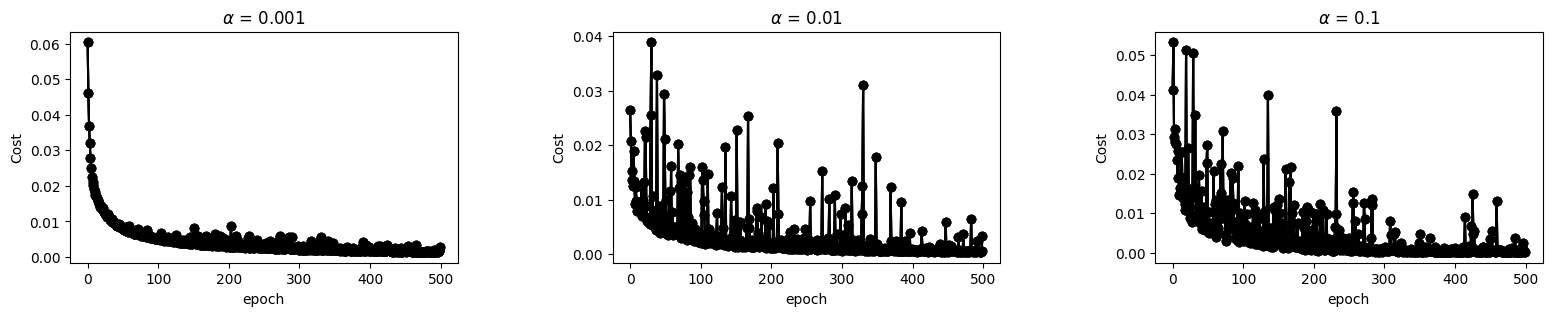

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (19,3))

for ax in enumerate(axes.flatten()):
    axes[0].plot(range(epochs),J_001,color='black',marker = 'o')
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel('Cost')
    axes[0].set_title(r'$\alpha$ = 0.001')
    
    axes[1].plot(range(epochs),J_01,color='black',marker='o')
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel('Cost')
    axes[1].set_title(r'$\alpha$ = 0.01')
    
    axes[2].plot(range(epochs),J_1,color='black',marker='o')
    axes[2].set_xlabel("epoch")
    axes[2].set_ylabel('Cost')
    axes[2].set_title(r'$\alpha$ = 0.1')
    
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

In [11]:
# Epochs: 100, 200, 300, 400, 500

# For learning rate a = 0.01:
print(format(J_01[99],".5f"))
print(format(J_01[199],".5f"))
print(format(J_01[299],".5f"))
print(format(J_01[399],".5f"))
print(format(J_01[499],".5f"))

# For learning rate a = 0.1:
print('\n',format(J_1[99],".5f"))
print(format(J_1[199],".5f"))
print(format(J_1[299],".5f"))
print(format(J_1[399],".5f"))
print(format(J_1[499],".5f"))

0.00363
0.00158
0.00082
0.00099
0.00326

 0.00635
0.00995
0.00061
0.00031
0.00025
